# Strategic Business Assessment of Food Business

## Data Pre-Processing

In [1]:
import pandas as pd
df=pd.read_csv('./Data/just tacos and burritos.csv')

In [2]:
df=df.loc[:,:'websites']

In [3]:
df.columns

Index(['id', 'address', 'categories', 'city', 'country', 'cuisines',
       'dateAdded', 'dateUpdated', 'keys', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.category',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'name', 'postalCode', 'priceRangeCurrency', 'priceRangeMin',
       'priceRangeMax', 'province', 'websites'],
      dtype='object')

In [4]:
df=df.drop(columns=['priceRangeCurrency',
'menus.category',
'menuPageURL',
'country',
'keys'])     # removing non relevant columns

In [5]:
df=df[df['menus.currency']!='EUR'] # deleting rows with currency in EUR as these restaurants are in Europe

In [6]:
df=df.drop(columns='cuisines',axis=1) # removing cuisine as category provides the same information

In [7]:
#calculating percent missing data across each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
id,id,0.000000
address,address,0.000000
categories,categories,0.000000
city,city,0.000000
dateAdded,dateAdded,0.000000
dateUpdated,dateUpdated,0.000000
menus.name,menus.name,0.000000
menus.dateSeen,menus.dateSeen,0.000000
name,name,0.003884
province,province,0.003884


In [8]:
df.columns

Index(['id', 'address', 'categories', 'city', 'dateAdded', 'dateUpdated',
       'latitude', 'longitude', 'menus.amountMax', 'menus.amountMin',
       'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
       'name', 'postalCode', 'priceRangeMin', 'priceRangeMax', 'province',
       'websites'],
      dtype='object')

In [9]:
df.categories

0        Restaurant Delivery Service,Restaurants,Pizza,...
1        Restaurant Delivery Service,Restaurants,Pizza,...
2             Golf Course, American Restaurant, and Resort
3                                     Fast Food Restaurant
4        Mexican Restaurant Mid-City West,Mexican Resta...
                               ...                        
77255                                           Restaurant
77256                                           Restaurant
77257                                           Restaurant
77258                                           Restaurant
77259                                           Restaurant
Name: categories, Length: 77244, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77244 entries, 0 to 77259
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 77244 non-null  object 
 1   address            77244 non-null  object 
 2   categories         77244 non-null  object 
 3   city               77244 non-null  object 
 4   dateAdded          77244 non-null  object 
 5   dateUpdated        77244 non-null  object 
 6   latitude           55620 non-null  float64
 7   longitude          55620 non-null  float64
 8   menus.amountMax    40244 non-null  float64
 9   menus.amountMin    40244 non-null  float64
 10  menus.currency     40495 non-null  object 
 11  menus.dateSeen     77244 non-null  object 
 12  menus.description  29307 non-null  object 
 13  menus.name         77244 non-null  object 
 14  name               77241 non-null  object 
 15  postalCode         76821 non-null  object 
 16  priceRangeMin      481

In [11]:
df.head()

,id,address,categories,city,dateAdded,dateUpdated,latitude,longitude,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province,websites
0,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,39.561570,-95.121020,NaN,NaN,NaN,2017-02-01T18:04:44Z,NaN,Taco,Gambino's Pizza,66002,NaN,NaN,KS,http://www.gambinospizza.com
1,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,39.561570,-95.121020,NaN,NaN,NaN,2016-03-02T11:49:34Z,"Beef, onion, cheddar cheese, lettuce, refried...",Taco,Gambino's Pizza,66002,NaN,NaN,KS,http://www.gambinospizza.com
2,AVwc__dF_7pvs4fz1Ncy,9521 Morton Davis Dr,"Golf Course, American Restaurant, and Resort",Patterson,2016-10-14T01:58:25Z,2016-10-14T01:58:25Z,37.401855,-121.266703,NaN,NaN,NaN,2016-10-14T01:58:25Z,"Beef barbacoa or chicken, spanish rice, pico d...",Smotherd Burrito,Diablo Grande Golf & Country Club,95363,NaN,NaN,Grayson,http://www.diablogrande.com/
3,AVwc__kCByjofQCxkdm-,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,NaN,NaN,NaN,NaN,NaN,2016-09-09T17:30:34Z,NaN,Sausage Burrito,Mcdonald's,80504,NaN,NaN,Niwot,http://mcdonalds.com
4,AVwc__WtByjofQCxkdkR,8495 W 3rd St,"Mexican Restaurant Mid-City West,Mexican Resta...",Los Angeles,2016-05-19T11:50:25Z,2016-09-11T00:06:37Z,34.080724,-118.389578,NaN,NaN,NaN,2016-05-19T11:50:25Z,"Wahoo, avocado, cabbage, pico de gallo and av...",Wahoo Tacogrilled,Baja Fresh Mexican Grill,90048,0.0,25.0,Bicentennial,http://bajafresh.com


### Data Cleaning of important attributes

In [12]:
df.province=df.province.str.upper()   # upper case provinces
df.name=df.name.str.lower()         # lower case name of restaurant 
df['menus.name']=df['menus.name'].str.lower()
df['menus.description']=df['menus.description'].str.lower()
df['city']=df['city'].str.lower()
df['categories']=df['categories'].str.lower()

In [13]:
df.head()

,id,address,categories,city,dateAdded,dateUpdated,latitude,longitude,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province,websites
0,AVwc__cikufWRAb51QjV,610 Commercial St,"restaurant delivery service,restaurants,pizza,...",atchison,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,39.561570,-95.121020,NaN,NaN,NaN,2017-02-01T18:04:44Z,NaN,taco,gambino's pizza,66002,NaN,NaN,KS,http://www.gambinospizza.com
1,AVwc__cikufWRAb51QjV,610 Commercial St,"restaurant delivery service,restaurants,pizza,...",atchison,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,39.561570,-95.121020,NaN,NaN,NaN,2016-03-02T11:49:34Z,"beef, onion, cheddar cheese, lettuce, refried...",taco,gambino's pizza,66002,NaN,NaN,KS,http://www.gambinospizza.com
2,AVwc__dF_7pvs4fz1Ncy,9521 Morton Davis Dr,"golf course, american restaurant, and resort",patterson,2016-10-14T01:58:25Z,2016-10-14T01:58:25Z,37.401855,-121.266703,NaN,NaN,NaN,2016-10-14T01:58:25Z,"beef barbacoa or chicken, spanish rice, pico d...",smotherd burrito,diablo grande golf & country club,95363,NaN,NaN,GRAYSON,http://www.diablogrande.com/
3,AVwc__kCByjofQCxkdm-,10550 W I 25 Frontage Rd,fast food restaurant,longmont,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,NaN,NaN,NaN,NaN,NaN,2016-09-09T17:30:34Z,NaN,sausage burrito,mcdonald's,80504,NaN,NaN,NIWOT,http://mcdonalds.com
4,AVwc__WtByjofQCxkdkR,8495 W 3rd St,"mexican restaurant mid-city west,mexican resta...",los angeles,2016-05-19T11:50:25Z,2016-09-11T00:06:37Z,34.080724,-118.389578,NaN,NaN,NaN,2016-05-19T11:50:25Z,"wahoo, avocado, cabbage, pico de gallo and av...",wahoo tacogrilled,baja fresh mexican grill,90048,0.0,25.0,BICENTENNIAL,http://bajafresh.com


In [14]:
df=df.reset_index().rename(columns={"index": "ind"})

In [15]:
df.columns

Index(['ind', 'id', 'address', 'categories', 'city', 'dateAdded',
       'dateUpdated', 'latitude', 'longitude', 'menus.amountMax',
       'menus.amountMin', 'menus.currency', 'menus.dateSeen',
       'menus.description', 'menus.name', 'name', 'postalCode',
       'priceRangeMin', 'priceRangeMax', 'province', 'websites'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77244 entries, 0 to 77243
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ind                77244 non-null  int64  
 1   id                 77244 non-null  object 
 2   address            77244 non-null  object 
 3   categories         77244 non-null  object 
 4   city               77244 non-null  object 
 5   dateAdded          77244 non-null  object 
 6   dateUpdated        77244 non-null  object 
 7   latitude           55620 non-null  float64
 8   longitude          55620 non-null  float64
 9   menus.amountMax    40244 non-null  float64
 10  menus.amountMin    40244 non-null  float64
 11  menus.currency     40495 non-null  object 
 12  menus.dateSeen     77244 non-null  object 
 13  menus.description  29307 non-null  object 
 14  menus.name         77244 non-null  object 
 15  name               77241 non-null  object 
 16  postalCode         768

In [17]:
df.name.value_counts().head(20)

chili's grill & bar         8296
taco bell                   2951
sonic drive in              2573
mcdonald's                  2003
jack in the box             1239
el pollo loco               1127
rubio's                     1055
baja fresh                   900
sonic drive-in               840
baja fresh mexican grill     549
baker's drive thru           427
denny's                      345
skyline chili                335
the cheesecake factory       320
chili's grill bar            273
long john silver's           255
carl's jr.                   203
mcdonalds                    201
la hacienda                  195
mc donald's                  182
Name: name, dtype: int64

The code chunk below is used to clean name of the restaurants for the top 20 frequent Restaurants in the dataset. It removes the variation in the name of the restaurant across the dataset.(lowercase, uppercase, hypen, apostrophe,etc.)

In [18]:
%%time
# cleaning name file for the top top 20 restaurants in the dataset
for i in range(df.shape[0]):
    if "donald" in str(df.name[i]):
        df.name[i] = "mcdonald"
    elif "chili's" in str(df.name[i]):
        df.name[i] = "chili's grill & bar"
    elif "chilis" in str(df.name[i]):
        df.name[i] = "chili's grill & bar"
    elif "taco bell" in str(df.name[i]):
        df.name[i] = "taco bell"
    elif "sonic" in str(df.name[i]):
        df.name[i] = "sonic drive in"
    elif "rubio" in str(df.name[i]):
        df.name[i] = "rubio's"
    elif "baker's" in str(df.name[i]):
        df.name[i] = "baker's drive thru"
    elif "cheesecake" in str(df.name[i]):
        df.name[i] = "the cheesecake factory"
    elif "long john" in str(df.name[i]):
        df.name[i] = "long john silver's"
    elif "baja fresh" in str(df.name[i]):
        df.name[i] = "baja fresh"

C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\mayan\Anaconda3\lib\site-pac

Wall time: 1min 30s


In [19]:
df.name.value_counts().head(20)

chili's grill & bar        8798
sonic drive in             3471
taco bell                  3025
mcdonald                   2429
baja fresh                 1471
jack in the box            1239
rubio's                    1144
el pollo loco              1127
long john silver's          468
baker's drive thru          452
the cheesecake factory      366
denny's                     345
skyline chili               335
carl's jr.                  203
la hacienda                 195
wienerschnitzel             167
casey's general store       141
freebirds world burrito     132
sombrero mexican food       128
taco casa                   125
Name: name, dtype: int64

In [20]:
t=list(df.name.unique())   # list of unique restaurant names 

In [21]:
df1=df.copy()   # to ensure df doesnt change with changes in df1

The code chunk below is to impute missing values of priceRangeMin and priceRangeMax column. The missing values are imputed by the median of the restaurant concerned. 

In [22]:
%%time
for i in t:
    index_1=list(df1.loc[df1.name==i,'ind'])
    df1.loc[df.ind.isin(index_1),'priceRangeMin']=df1.loc[df.ind.isin(index_1),'priceRangeMin'].fillna(df1.loc[df.ind.isin(index_1),'priceRangeMin'].median())
    df1.loc[df.ind.isin(index_1),'priceRangeMax']=df1.loc[df.ind.isin(index_1),'priceRangeMax'].fillna(df1.loc[df.ind.isin(index_1),'priceRangeMax'].median())
    #if df1.loc[df1.name==i,'priceRangeMin'].isnull():
     #    df1.loc[df1.name==i,'priceRangeMin']=df1.loc[df1.name==i,'priceRangeMin'].median()
    

Wall time: 13min 29s


## Feature Engineering

Groupby postalcode and address and count unique restaurants within a zipcode. Address is added in groupby to include the count of restaurants with the same name but different address within a zipcode.

In [23]:
df2=df1.groupby(['postalCode','address'])['name'].nunique().reset_index(name='COUNTd')

In [24]:
df3=df2.groupby(['postalCode'])['COUNTd'].sum().sort_values(ascending=False).reset_index(name='Count_res')

In [25]:
df3.head()  # count_res is the frequency of a restaurant within a zipcode

,postalCode,Count_res
0,92101,43
1,92109,43
2,94110,39
3,89109,37
4,80202,29


In [26]:
df3.to_csv('./Data/zip_res.csv',index=False)   

In [27]:
df3['postalCode']=df3['postalCode'].str.slice(0,5,1)

In [28]:
df_zip_capita=pd.read_csv('./Data/zip per capita income.csv')   # importing external dataset with per capita income across zip
df_zip_capita.head()

,zip,pcapita
0,601,7041
1,602,8978
2,603,10897
3,606,5960
4,610,9266


In [29]:
df_zip_capita.zip=df_zip_capita.zip.astype('str')
df_zip_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zip      33120 non-null  object
 1   pcapita  33120 non-null  object
dtypes: object(2)
memory usage: 517.6+ KB


In [30]:
df3=pd.merge(df3, df_zip_capita, left_on='postalCode', right_on='zip', how='inner')   # Merging our featuring engineering 
                                                                                    #table with external percapita dataset
df3

,postalCode,Count_res,zip,pcapita
0,92101,43,92101,55898
1,92109,43,92109,46687
2,94110,39,94110,59660
3,94110,2,94110,59660
4,94110,2,94110,59660
...,...,...,...,...
7390,60438,1,60438,25794
7391,60433,1,60433,20544
7392,60432,1,60432,15919
7393,60431,1,60431,34347


In [31]:
df_dense=pd.read_csv('./Data/uszips.csv')    # importing in pandas population density data by zip
df_dense.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,18570,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",False,False,America/Puerto_Rico
1,602,18.36073,-67.17517,Aguada,PR,Puerto Rico,True,NaN,41520,523.5,72003,Aguada,{'72003':100},False,False,America/Puerto_Rico
2,603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,True,NaN,54689,667.9,72005,Aguadilla,{'72005':100},False,False,America/Puerto_Rico
3,606,18.16724,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6615,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",False,False,America/Puerto_Rico
4,610,18.29032,-67.12243,Anasco,PR,Puerto Rico,True,NaN,29016,312.0,72011,Añasco,"{'72003':0.55,'72011':99.45}",False,False,America/Puerto_Rico


 Merging existing dataframe with exnternal data containing population denisty information by zip. Followed by feature engineering- creating a column which ratio between population density to frequency of occurence of a restaurant within the zip

In [32]:
df_dense.zip=df_zip_capita.zip.astype('str')
df3=pd.merge(df3, df_dense, left_on='postalCode', right_on='zip', how='inner')
df3['densitycountratio']=df3['density']/df3['Count_res']      
df3

,postalCode,Count_res,zip_x,pcapita,zip_y,lat,lng,city,state_id,state_name,...,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone,densitycountratio
0,92101,43,92101,55898,92101,32.81010,-117.03279,San Diego,CA,California,...,NaN,23057,1300.8,6073,San Diego,{'06073':100},False,False,America/Los_Angeles,30.251163
1,92109,43,92109,46687,92109,32.99935,-117.07179,San Diego,CA,California,...,NaN,47490,1638.9,6073,San Diego,{'06073':100},False,False,America/Los_Angeles,38.113953
2,94110,39,94110,59660,94110,37.72215,-122.48486,San Francisco,CA,California,...,NaN,28129,3492.3,6075,San Francisco,{'06075':100},False,False,America/Los_Angeles,89.546154
3,94110,2,94110,59660,94110,37.72215,-122.48486,San Francisco,CA,California,...,NaN,28129,3492.3,6075,San Francisco,{'06075':100},False,False,America/Los_Angeles,1746.150000
4,94110,2,94110,59660,94110,37.72215,-122.48486,San Francisco,CA,California,...,NaN,28129,3492.3,6075,San Francisco,{'06075':100},False,False,America/Los_Angeles,1746.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,60438,1,60438,25794,60438,41.36951,-88.43282,Morris,IL,Illinois,...,NaN,20332,49.9,17063,Grundy,"{'17063':99.77,'17093':0.23}",False,False,America/Chicago,49.900000
7391,60433,1,60433,20544,60433,41.63180,-88.10459,Romeoville,IL,Illinois,...,NaN,39807,919.3,17197,Will,{'17197':100},False,False,America/Chicago,919.300000
7392,60432,1,60432,15919,60432,41.63501,-87.73620,Midlothian,IL,Illinois,...,NaN,26057,1454.8,17031,Cook,{'17031':100},False,False,America/Chicago,1454.800000
7393,60431,1,60431,34347,60431,41.24234,-88.40224,Mazon,IL,Illinois,...,NaN,1761,14.4,17063,Grundy,{'17063':100},False,False,America/Chicago,14.400000


In [33]:
df3=df3[df3.pcapita!='-']    # removing non numeric values from income per capita column
df3=df3[df3.pcapita!='N']

Scaling the inputs to our selection index column (inputs are percapita income, and population density to frequency of a restaurant within the zip ) to remove any bias toward variable having higher variance

In [34]:
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
df3[['densitycountratio', 'pcapita']]=sl.fit_transform(df3[['densitycountratio', 'pcapita']])


In [35]:
df3['selection_index']=df3['densitycountratio']+df3['pcapita']    # Defining new feature as column
df3 

,postalCode,Count_res,zip_x,pcapita,zip_y,lat,lng,city,state_id,state_name,...,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone,densitycountratio,selection_index
0,92101,43,92101,1.300090,92101,32.81010,-117.03279,San Diego,CA,California,...,23057,1300.8,6073,San Diego,{'06073':100},False,False,America/Los_Angeles,-0.327032,0.973058
1,92109,43,92109,0.743399,92109,32.99935,-117.07179,San Diego,CA,California,...,47490,1638.9,6073,San Diego,{'06073':100},False,False,America/Los_Angeles,-0.323064,0.420334
2,94110,39,94110,1.527457,94110,37.72215,-122.48486,San Francisco,CA,California,...,28129,3492.3,6075,San Francisco,{'06075':100},False,False,America/Los_Angeles,-0.297115,1.230342
3,94110,2,94110,1.527457,94110,37.72215,-122.48486,San Francisco,CA,California,...,28129,3492.3,6075,San Francisco,{'06075':100},False,False,America/Los_Angeles,0.538719,2.066175
4,94110,2,94110,1.527457,94110,37.72215,-122.48486,San Francisco,CA,California,...,28129,3492.3,6075,San Francisco,{'06075':100},False,False,America/Los_Angeles,0.538719,2.066175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,60438,1,60438,-0.519325,60438,41.36951,-88.43282,Morris,IL,Illinois,...,20332,49.9,17063,Grundy,"{'17063':99.77,'17093':0.23}",False,False,America/Chicago,-0.317118,-0.836443
7391,60433,1,60433,-0.836623,60433,41.63180,-88.10459,Romeoville,IL,Illinois,...,39807,919.3,17197,Will,{'17197':100},False,False,America/Chicago,0.121535,-0.715088
7392,60432,1,60432,-1.116147,60432,41.63501,-87.73620,Midlothian,IL,Illinois,...,26057,1454.8,17031,Cook,{'17031':100},False,False,America/Chicago,0.391719,-0.724428
7393,60431,1,60431,-0.002402,60431,41.24234,-88.40224,Mazon,IL,Illinois,...,1761,14.4,17063,Grundy,{'17063':100},False,False,America/Chicago,-0.335029,-0.337431


In [36]:
df3.to_csv('./Data/reco_si.csv',index=False)    # Exporting the results as a csv to visaulise the dataset on tableau

In [37]:
df3.describe()

,Count_res,pcapita,lat,lng,parent_zcta,population,density,county_fips,densitycountratio,selection_index
count,7388.000000,7.388000e+03,7388.000000,7388.000000,0.0,7388.000000,7388.000000,7388.000000,7.388000e+03,7.388000e+03
mean,2.600568,3.955958e-16,37.573634,-93.637430,NaN,17139.561180,1220.203249,26869.532891,-9.341209e-17,2.067768e-17
std,2.727165,1.000068e+00,5.088264,16.936793,NaN,17630.148557,3343.969825,16344.729844,1.000068e+00,1.503967e+00
min,1.000000,-1.858865e+00,18.128510,-165.805910,NaN,0.000000,0.000000,1003.000000,-3.422947e-01,-2.157984e+00
25%,1.000000,-6.440230e-01,33.927298,-106.375795,NaN,2324.250000,24.900000,12057.000000,-3.348905e-01,-8.579843e-01
50%,2.000000,-2.498033e-01,38.272750,-88.545540,NaN,11872.500000,230.400000,26115.000000,-2.814338e-01,-4.020605e-01
75%,3.000000,3.654671e-01,41.276632,-80.602238,NaN,27491.500000,1207.550000,41039.500000,-5.231941e-02,3.793452e-01
max,43.000000,9.811162e+00,70.138500,-65.440930,NaN,113916.000000,66553.400000,72147.000000,1.878046e+01,2.292469e+01


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7388 entries, 0 to 7394
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   postalCode          7388 non-null   object 
 1   Count_res           7388 non-null   int64  
 2   zip_x               7388 non-null   object 
 3   pcapita             7388 non-null   float64
 4   zip_y               7388 non-null   object 
 5   lat                 7388 non-null   float64
 6   lng                 7388 non-null   float64
 7   city                7388 non-null   object 
 8   state_id            7388 non-null   object 
 9   state_name          7388 non-null   object 
 10  zcta                7388 non-null   bool   
 11  parent_zcta         0 non-null      float64
 12  population          7388 non-null   int64  
 13  density             7388 non-null   float64
 14  county_fips         7388 non-null   int64  
 15  county_name         7388 non-null   object 
 16  all_co

In [39]:
#df_1=pd.read_csv('./Data/data_clean.csv')
#df_1.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77244 entries, 0 to 77243
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ind                77244 non-null  int64  
 1   id                 77244 non-null  object 
 2   address            77244 non-null  object 
 3   categories         77244 non-null  object 
 4   city               77244 non-null  object 
 5   dateAdded          77244 non-null  object 
 6   dateUpdated        77244 non-null  object 
 7   latitude           55620 non-null  float64
 8   longitude          55620 non-null  float64
 9   menus.amountMax    40244 non-null  float64
 10  menus.amountMin    40244 non-null  float64
 11  menus.currency     40495 non-null  object 
 12  menus.dateSeen     77244 non-null  object 
 13  menus.description  29307 non-null  object 
 14  menus.name         77244 non-null  object 
 15  name               77241 non-null  object 
 16  postalCode         768

In [40]:
#df_1.info()
df['postalCode']=df['postalCode'].str.slice(0,5,1)  # using first 5 characters in postal code column

In [41]:
df_r=df_dense[['zip','state_id']]

Merging state_id from an external dataset joining by zip code

In [42]:
df_1=pd.merge(df, df_r, left_on='postalCode', right_on='zip', how='left') 
print(df_1.shape)
print(df_1.head())

(77244, 23)
   ind                    id                   address  \
0    0  AVwc__cikufWRAb51QjV         610 Commercial St   
1    1  AVwc__cikufWRAb51QjV         610 Commercial St   
2    2  AVwc__dF_7pvs4fz1Ncy      9521 Morton Davis Dr   
3    3  AVwc__kCByjofQCxkdm-  10550 W I 25 Frontage Rd   
4    4  AVwc__WtByjofQCxkdkR             8495 W 3rd St   

                                          categories         city  \
0  restaurant delivery service,restaurants,pizza,...     atchison   
1  restaurant delivery service,restaurants,pizza,...     atchison   
2       golf course, american restaurant, and resort    patterson   
3                               fast food restaurant     longmont   
4  mexican restaurant mid-city west,mexican resta...  los angeles   

              dateAdded           dateUpdated   latitude   longitude  \
0  2016-03-02T11:49:34Z  2017-02-01T18:04:44Z  39.561570  -95.121020   
1  2016-03-02T11:49:34Z  2017-02-01T18:04:44Z  39.561570  -95.121020   
2  2016-

In [43]:
df_1.to_csv('./Data/data_clean.csv',index=False)   # Exporting clean dataset for visualization using Tableau 

### Boxplot for princerange min, max and selection_index

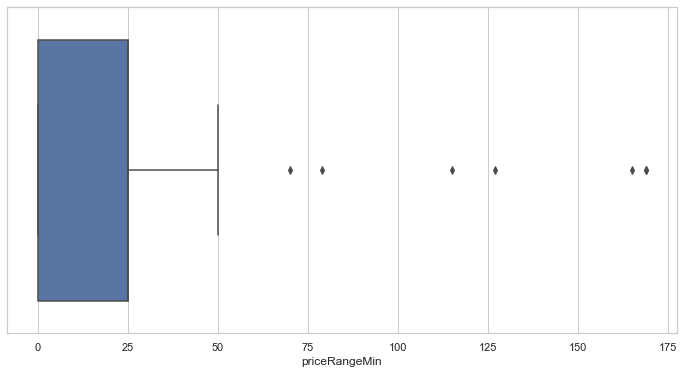

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
sns.boxplot(x='priceRangeMin',data=df_1[df_1['priceRangeMin']< 200])


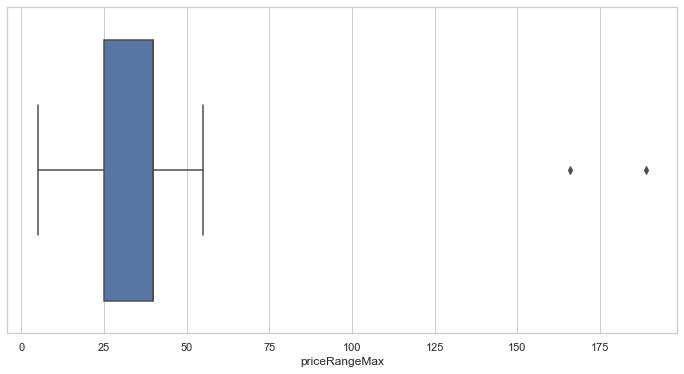

In [45]:
plt.figure(figsize = (12,6))
sns.boxplot(x='priceRangeMax',data=df_1[df_1['priceRangeMax']< 200])


In [46]:
df_1[['priceRangeMin','priceRangeMax']].describe()  #statistics of price range 

,priceRangeMin,priceRangeMax
count,48159.000000,48159.000000
mean,13.734837,33.722627
std,14.704344,10.395812
min,0.000000,5.000000
25%,0.000000,25.000000
50%,25.000000,40.000000
75%,25.000000,40.000000
max,378.000000,755.000000


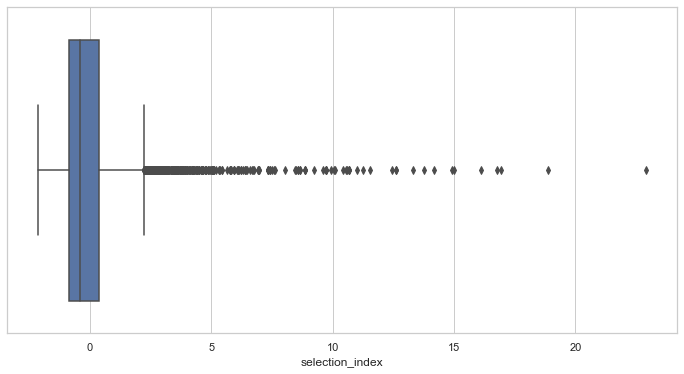

In [47]:
plt.figure(figsize = (12,6))
sns.boxplot(x='selection_index',data=df3)

In [48]:
df3['selection_index'].describe()

count    7.388000e+03
mean     2.067768e-17
std      1.503967e+00
min     -2.157984e+00
25%     -8.579843e-01
50%     -4.020605e-01
75%      3.793452e-01
max      2.292469e+01
Name: selection_index, dtype: float64

## Word Cloud of Ingredients used in Burrito and Taco

In [49]:
%matplotlib inline
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer as ss
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
df_t=pd.read_csv('./Data/taco_data.csv') 
df_b=pd.read_csv('./Data/burrito.csv')

In [51]:
df_t.head()     #taco dish ingredients 

,Unnamed: 0,menus.description,menus.name
0,0,"Beef, onion, cheddar cheese, lettuce, refried...",Taco
1,2,"Wahoo, avocado, cabbage, pico de gallo and av...",Taco
2,3,"Hand breaded fried wahoo, topped with cabbag...",Taco
3,4,Any combination of two original baja or americ...,Taco
4,5,"Grilled corn tortillas with salsa, onions and ...",Taco


In [52]:
df_b.head()     #burrito dish ingredients

,Unnamed: 0,menus.description,menus.name
0,1,"Beef barbacoa or chicken, spanish rice, pico d...",Burrito
1,6,Cabo style or caesar style.,Burrito
2,7,"Black beans, rice, jack cheese, onions, cilant...",Burrito
3,8,"Black or pinto beans, rice, cilantro and onion...",Burrito
4,9,"Melted jack cheese, guacamole and pico de gall...",Burrito


In [53]:
df = df_1["menus.description"].dropna()
df =pd.DataFrame(df)
df.head()
#df.drop('index', axis = 1)

,menus.description
1,"beef, onion, cheddar cheese, lettuce, refried..."
2,"beef barbacoa or chicken, spanish rice, pico d..."
4,"wahoo, avocado, cabbage, pico de gallo and av..."
5,"hand breaded fried wahoo, topped with cabbag..."
6,any combination of two original baja or americ...


Function used to cleanup the description column i.e the column specifying the ingredients

In [54]:
import re
cleanup_re = re.compile('[^a-z]+')
def clean_up(review):
    review = str(review)
    review = review.lower()
    review = cleanup_re.sub(' ', review).strip()
    return review


In [55]:
#Cleanup on taco data and building wordcloud
df_t["Clean"] = df_t["menus.description"].apply(clean_up)    

df_t.head()

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


plt.rcParams['font.size']=12          
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 

In [56]:
#Cleanup on burrito data and building wordcloud
df_b["Clean"] = df_b["menus.description"].apply(clean_up)

df_b.head()

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


plt.rcParams['font.size']=12          
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 

In [57]:
#function for plotting wordcloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

### Wordcloud for Taco

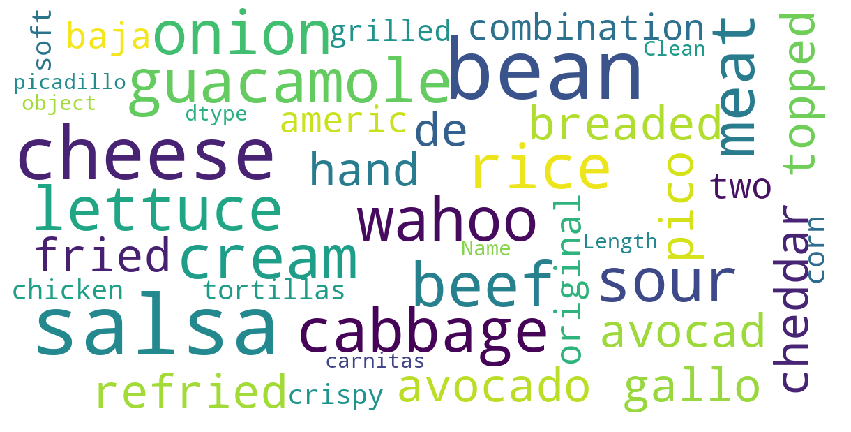

In [58]:
show_wordcloud(df_t["Clean"])

### Wordcloud for Burrito

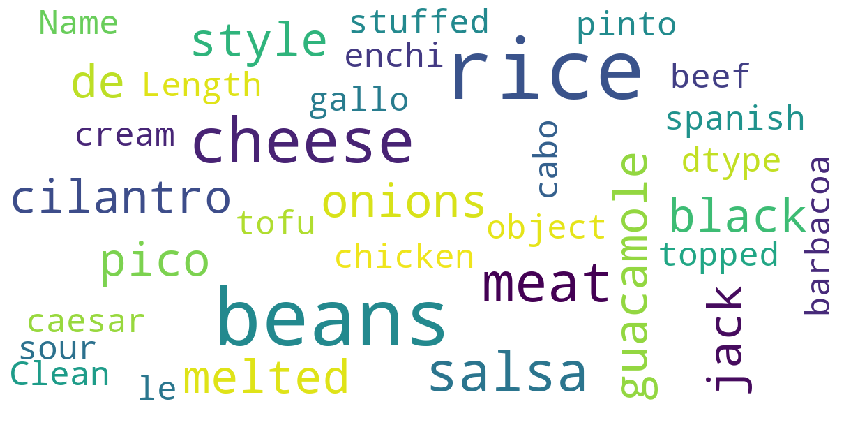

In [59]:
show_wordcloud(df_b["Clean"])